In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['font.size']=18

In [3]:
import sys
sys.path.append('/home/gjones/')

In [4]:
import pmc_sim
reload(pmc_sim)

<module 'pmc_sim' from '/home/gjones/pmc_sim.pyc'>

In [5]:
df,pmcs = pmc_sim.process_all_sim()

[Parallel(n_jobs=20)]: Done   1 out of  85 | elapsed:    5.9s remaining:  8.2min
[Parallel(n_jobs=20)]: Done  15 out of  85 | elapsed:   11.7s remaining:   54.8s
[Parallel(n_jobs=20)]: Done  33 out of  85 | elapsed:   15.2s remaining:   23.9s
[Parallel(n_jobs=20)]: Done  51 out of  85 | elapsed:   21.8s remaining:   14.5s
[Parallel(n_jobs=20)]: Done  69 out of  85 | elapsed:   27.3s remaining:    6.3s
[Parallel(n_jobs=20)]: Done  85 out of  85 | elapsed:   35.1s finished


In [26]:
df.prefix.value_counts()

L0100k_19l.01.001    40
L0100k_20n.03.001    25
L0100k_24b.01.001    14
L0100k_42i.04.001     6
dtype: int64

In [6]:
df.columns

Index([u'altitude', u'filename', u'full_filename', u'k', u'prefix', u'psds',
       u'scale', u'scale_m', u'x', u'x_segment_powlaw_nfev',
       u'x_segment_powlaw_red_exp', u'x_segment_powlaw_red_exp_err',
       u'x_segment_powlaw_red_scale', u'x_segment_powlaw_red_scale_err',
       u'x_segment_powlaw_residual', u'x_segment_powlaw_white_noise',
       u'x_segment_powlaw_white_noise_err', u'x_segment_roll_nfev',
       u'x_segment_roll_red_exp', u'x_segment_roll_red_exp_err',
       u'x_segment_roll_red_scale', u'x_segment_roll_red_scale_err',
       u'x_segment_roll_residual', u'x_segment_roll_roll_exp',
       u'x_segment_roll_roll_exp_err', u'x_segment_roll_roll_fc',
       u'x_segment_roll_roll_fc_err', u'x_segment_roll_white_noise',
       u'x_segment_roll_white_noise_err', u'x_whole_image_powlaw_nfev',
       u'x_whole_image_powlaw_red_exp', u'x_whole_image_powlaw_red_exp_err',
       u'x_whole_image_powlaw_red_scale',
       u'x_whole_image_powlaw_red_scale_err', u'x_whole_ima

In [7]:
df.x_segment_roll_roll_fc.iloc[0]

array([  10.20826125,   18.85588014,   57.69826528,  132.27953021,
         26.55211559,   29.56313664])

In [19]:
dd = df[(df.x_whole_image_roll_residual<1e3)]# & (df.x_whole_image_roll_roll_fc>50)]

(0, 0.25)

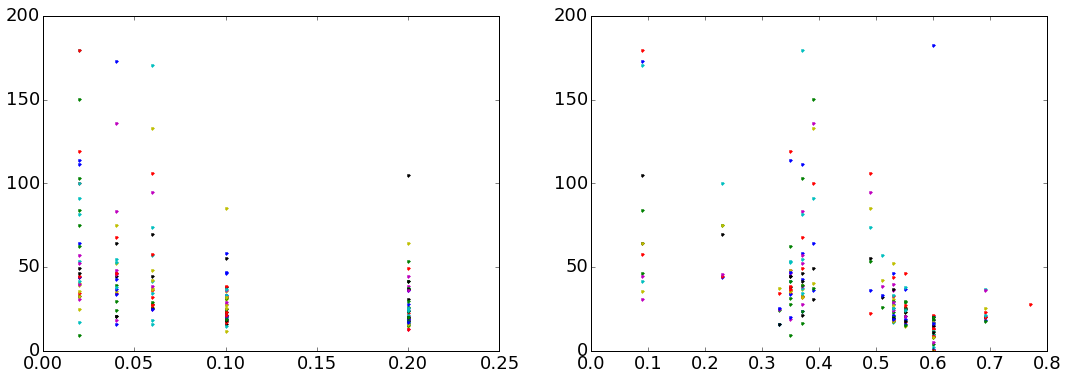

In [20]:
fig,axs = subplots(1,2,figsize=(18,6))
for k,row in dd.iterrows():
    for idx in range(6):
        if row.x_segment_roll_residual[idx] < 1e3:
            axs[0].plot(row.scale,row.x_segment_roll_roll_fc[idx],'.')
            axs[1].plot(row.altitude,row.x_segment_roll_roll_fc[idx],'.')
#    plot(row.scale,row.x_segment_roll_roll_fc[4],'o')
axs[0].set_xlim(0,.25)

(0, 0.25)

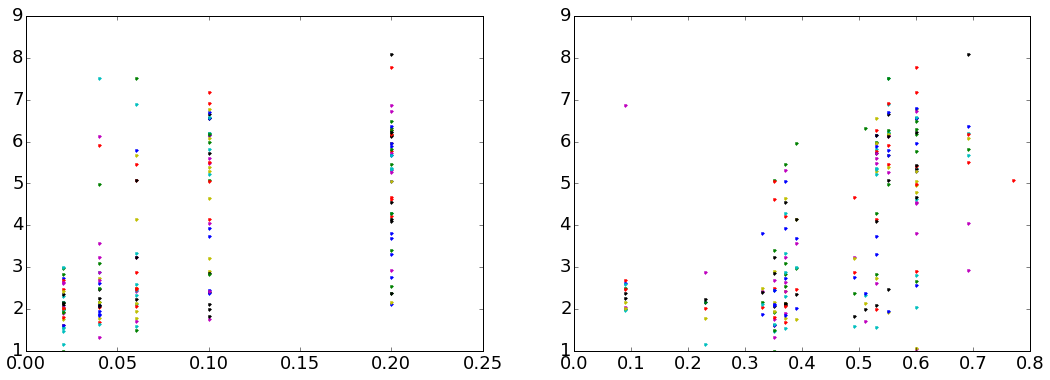

In [21]:
fig,axs = subplots(1,2,figsize=(18,6))
for k,row in dd.iterrows():
    for idx in range(6):
        if row.x_segment_roll_residual[idx] < 1e3:
            axs[0].plot(row.scale,row.x_segment_roll_roll_exp[idx],'.')
            axs[1].plot(row.altitude,row.x_segment_roll_roll_exp[idx],'.')
#    plot(row.scale,row.x_segment_roll_roll_fc[4],'o')
axs[0].set_xlim(0,.25)

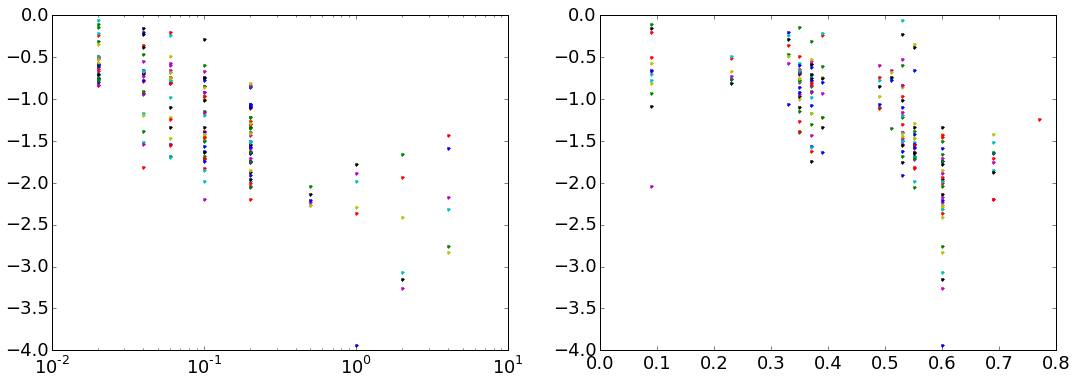

In [25]:
fig,axs = subplots(1,2,figsize=(18,6))
for k,row in dd.iterrows():
    for idx in range(6):
        if row.x_segment_roll_residual[idx] < 1e3:
            axs[0].semilogx(row.scale,row.x_segment_roll_red_exp[idx],'.')
            axs[1].plot(row.altitude,row.x_segment_roll_red_exp[idx],'.')
#    plot(row.scale,row.x_segment_roll_roll_fc[4],'o')
#axs[0].set_xlim(0,.25)

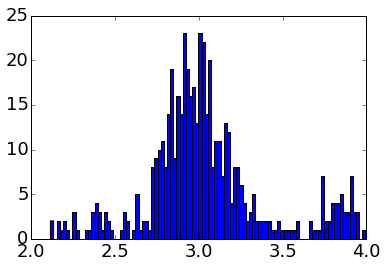

In [10]:
resid = []
for k,row in df.iterrows():
    resid.extend(row.x_segment_roll_residual)
blah = hist(np.log10(resid),bins=100)

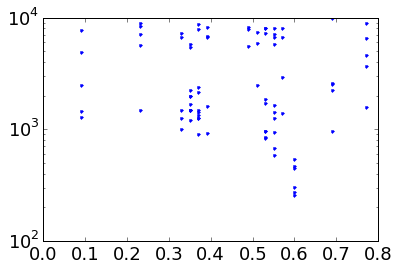

In [11]:
maxresid = np.max(np.array(resid).reshape((-1,6)),axis=1)
semilogy(df.altitude,maxresid,'.')


In [12]:
df.altitude.value_counts()

0.35    10
0.37    10
0.55    10
0.53     9
0.60     6
0.23     5
0.39     5
0.77     5
0.33     5
0.69     5
0.09     5
0.57     4
0.49     3
0.51     3
dtype: int64

In [23]:
df.scale.value_counts()

0.20    18
0.10    18
0.06    17
0.04    15
0.02    13
1.00     1
4.00     1
2.00     1
0.50     1
dtype: int64

In [29]:
df.prefix.value_counts()

L0100k_19l.01.001    40
L0100k_20n.03.001    25
L0100k_24b.01.001    14
L0100k_42i.04.001     6
dtype: int64

In [13]:
dd.shape

(63, 49)

In [38]:
dd = df[df.prefix=='L0100k_42i.04.001']

[ 223.93147997  303.96777769  234.43265115  290.59201365  288.85367531
  281.50273906]
[ 179.76895554  247.15878392  236.60714139  274.87356759  266.31779913
  152.14882403]
[ 259.69260218  189.52650038  249.92781059  209.77274835  247.78599166
  143.22288461]
[ 229.25190572  147.88299004  182.39111104  159.91074085  243.72502844
  544.20335602]
[ 180.96961128  157.62705951  361.57475595  445.49231796  129.93010548
  133.46377157]
[ 471.0228714   344.85536722  258.09861572  163.98024529  247.03819631
  429.03730336]


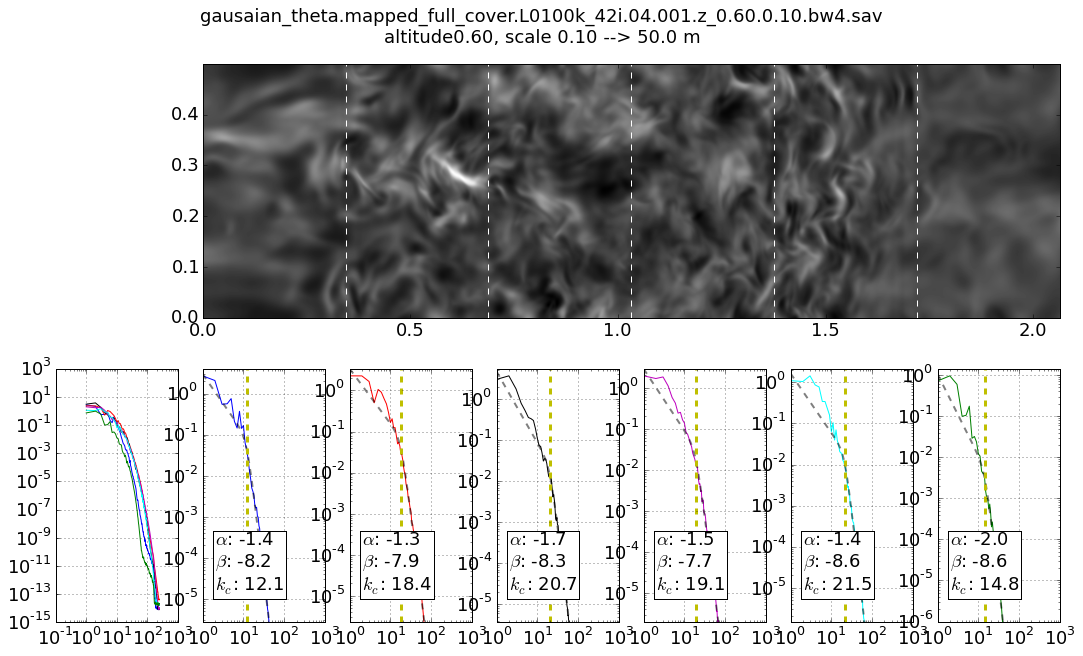

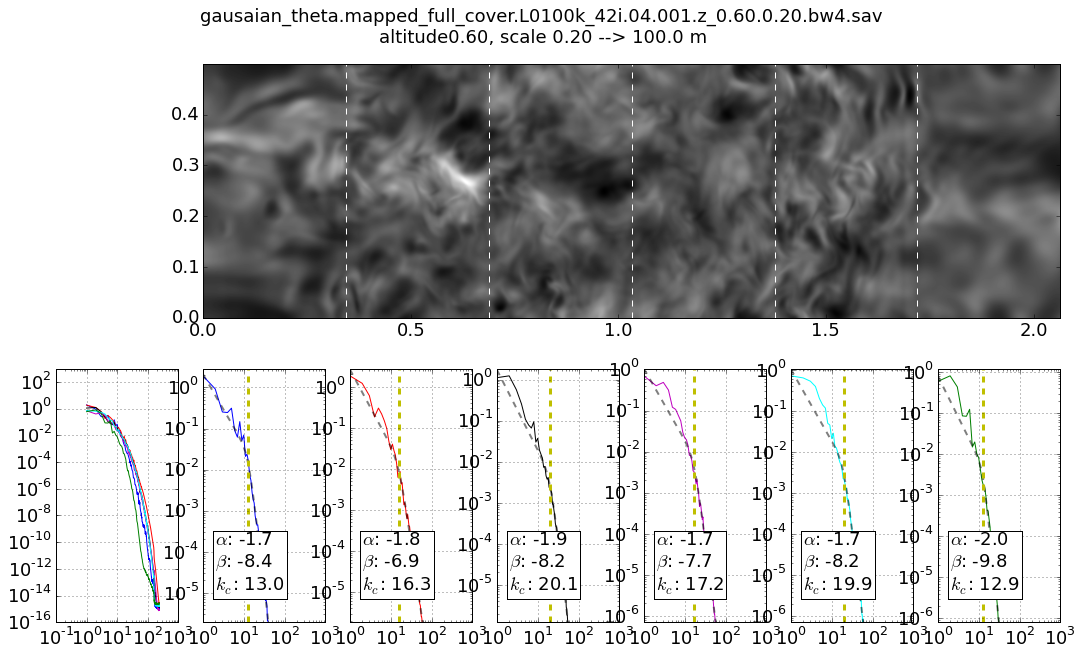

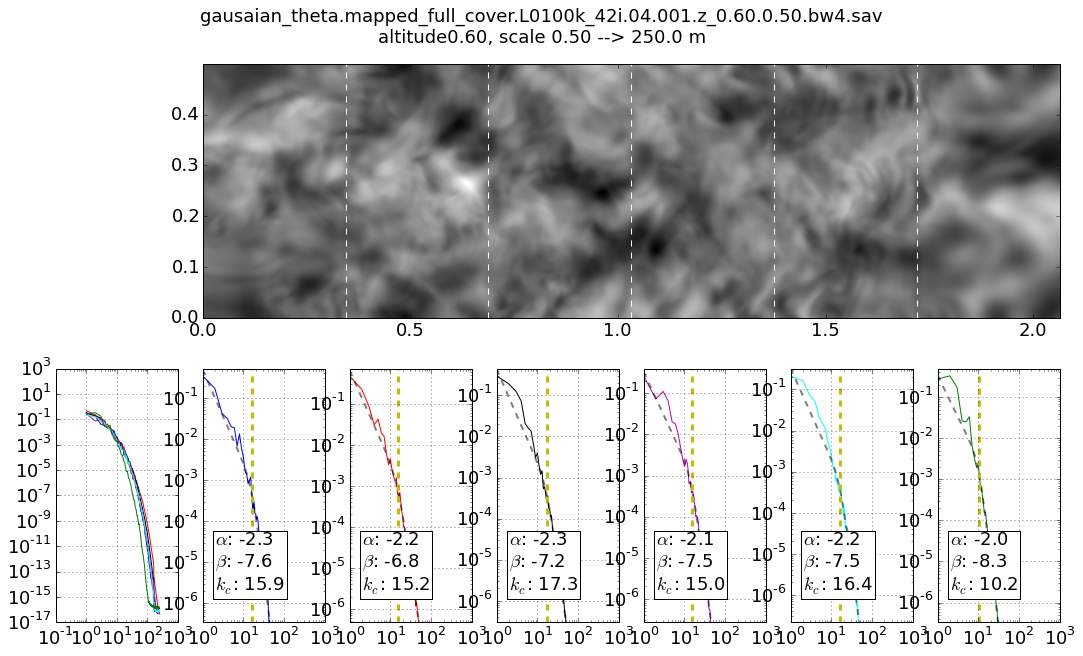

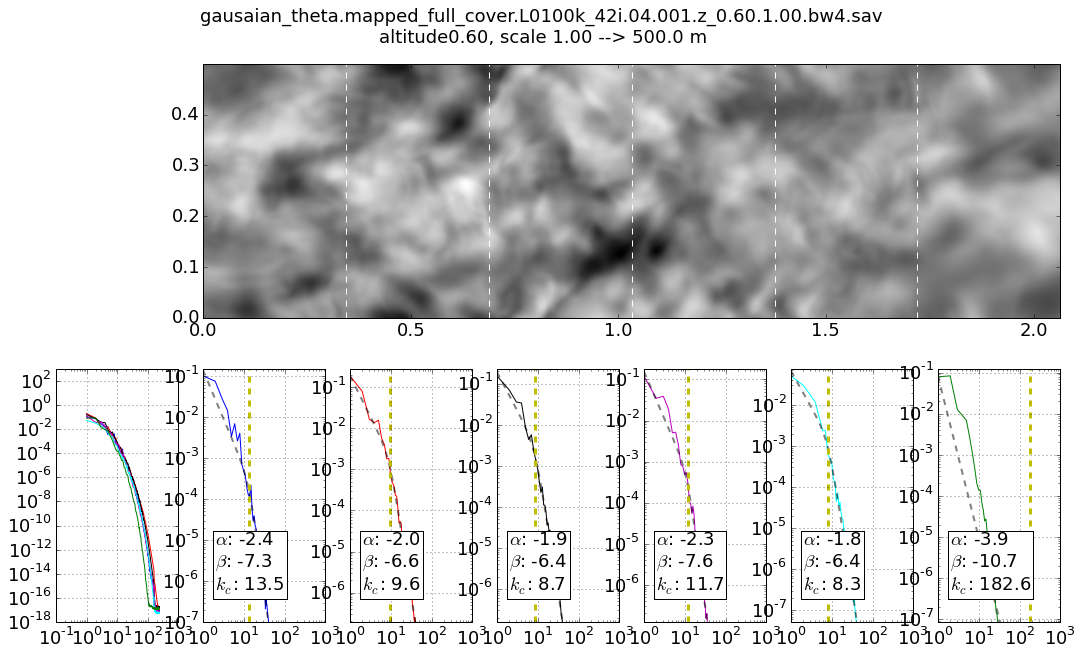

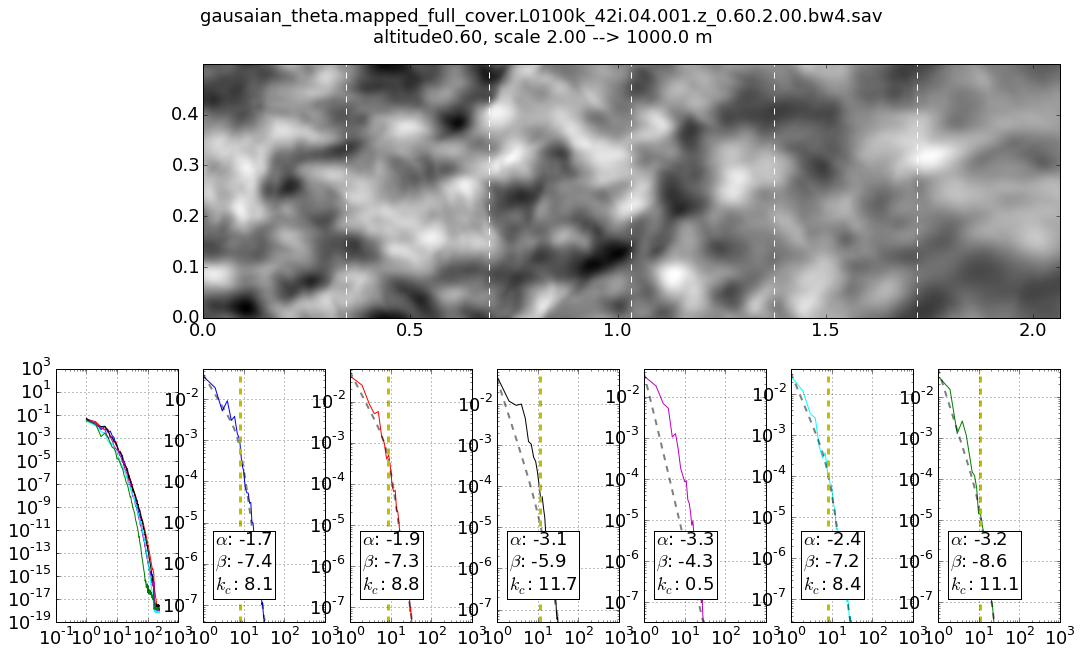

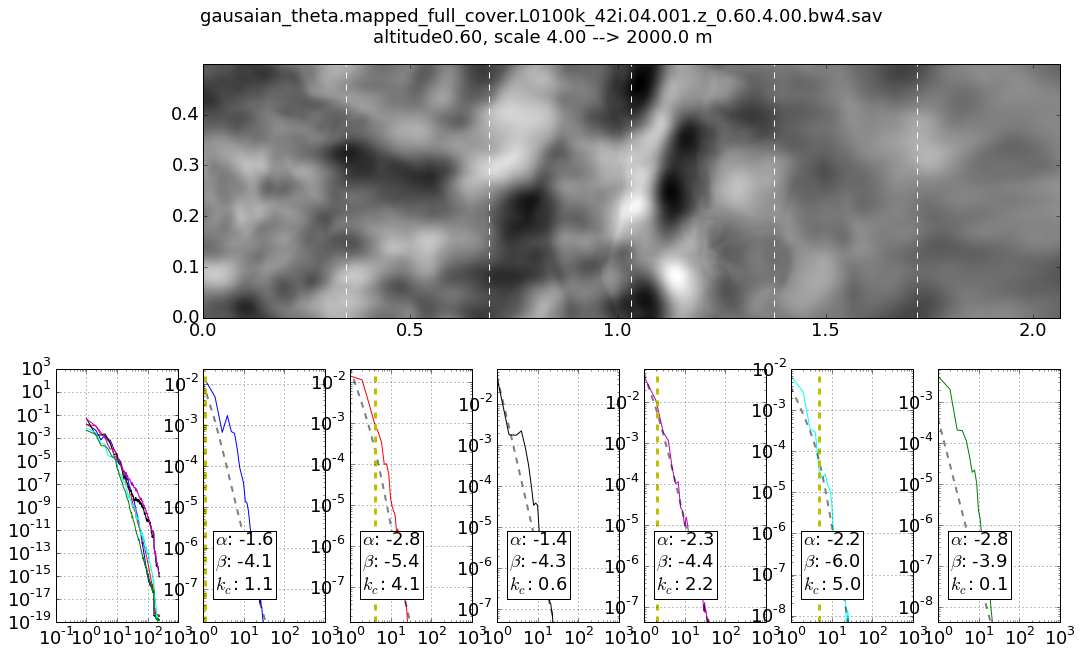

In [30]:
for k,row in dd.iterrows():
    pmc_sim.plot_row(row)
    print row.x_segment_roll_residual
    #7/0

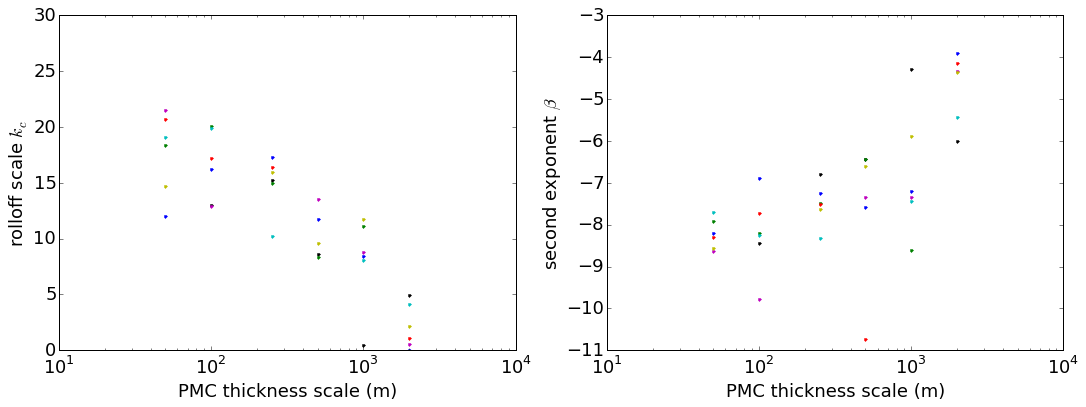

In [46]:
fig,axs = subplots(1,2,figsize=(18,6))
for k,row in dd.iterrows():
    for idx in range(6):
        if row.x_segment_roll_residual[idx] < 1e3:
            axs[0].semilogx(row.scale_m,row.x_segment_roll_roll_fc[idx],'.')
            axs[1].semilogx(row.scale_m,row.x_segment_roll_red_exp[idx]-row.x_segment_roll_roll_exp[idx],'.')
axs[0].set_ylim(0,30)
axs[0].set_xlabel('PMC thickness scale (m)')
axs[0].set_ylabel('rolloff scale $k_c$')
axs[1].set_xlabel('PMC thickness scale (m)')
axs[1].set_ylabel(r'second exponent $\beta$')

In [35]:
dd.scale.value_counts()

0.10    3
0.06    3
0.04    3
0.20    3
0.02    2
dtype: int64

In [36]:
dd.altitude.value_counts()

0.69    5
0.55    5
0.53    4
dtype: int64

In [47]:
#dd = df[np.abs(df.scale-2)<5e-2]
dd = df[(df.prefix=='L0100k_24b.01.001') & (df.altitude==0.55)]

[ 7183.42428755  1567.55902672  6097.95211574  1271.88702514  7115.74795424
  1332.91494243]
[  889.27791672  1089.03274168   933.37291438   681.74077417  1425.82679486
   379.26644493]
[ 676.32291764  948.99171749  741.35733157  525.98333952  704.09029311
  428.83738741]
[ 560.2894681   679.97850559  587.1846675   538.8153515   553.26670225
  357.26080461]
[ 523.65696412  588.45910243  583.88781258  527.85591983  524.35521869
  277.89788948]


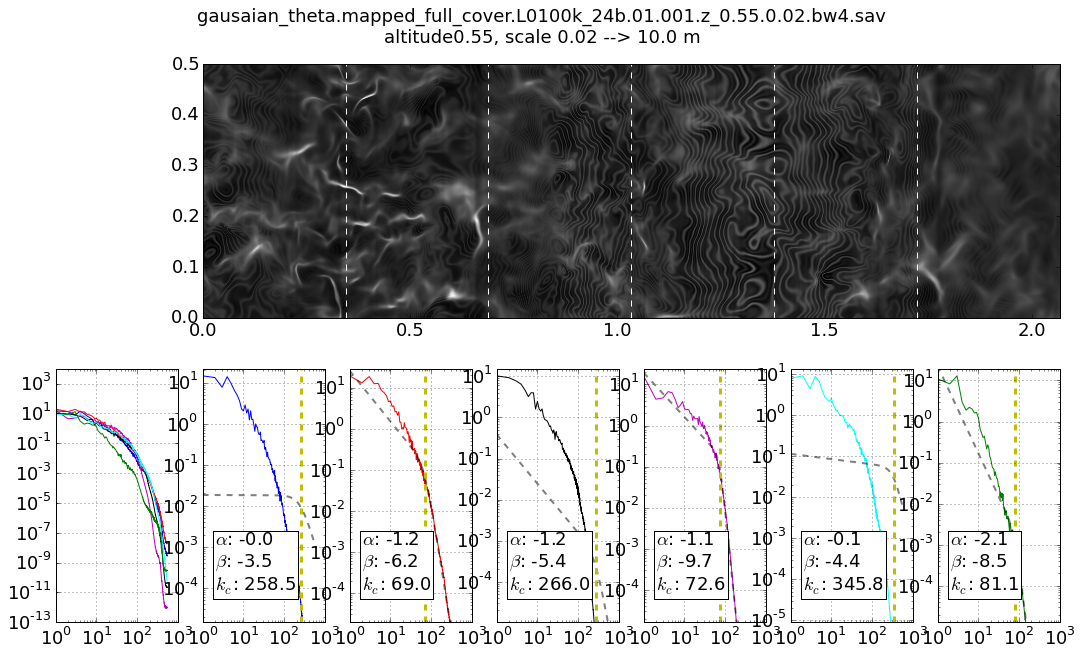

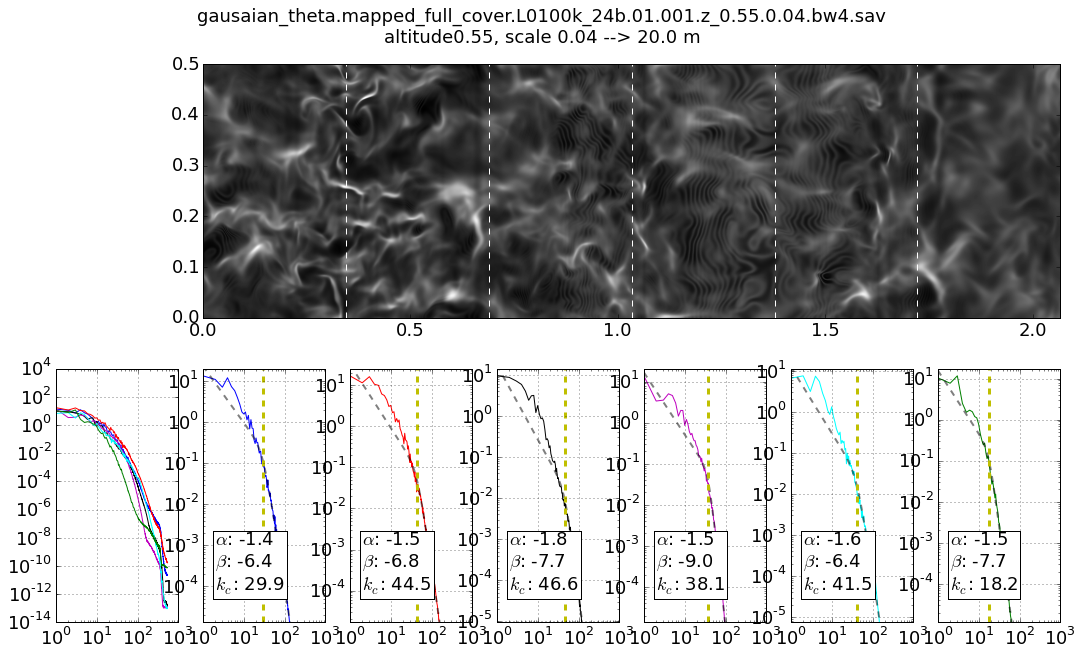

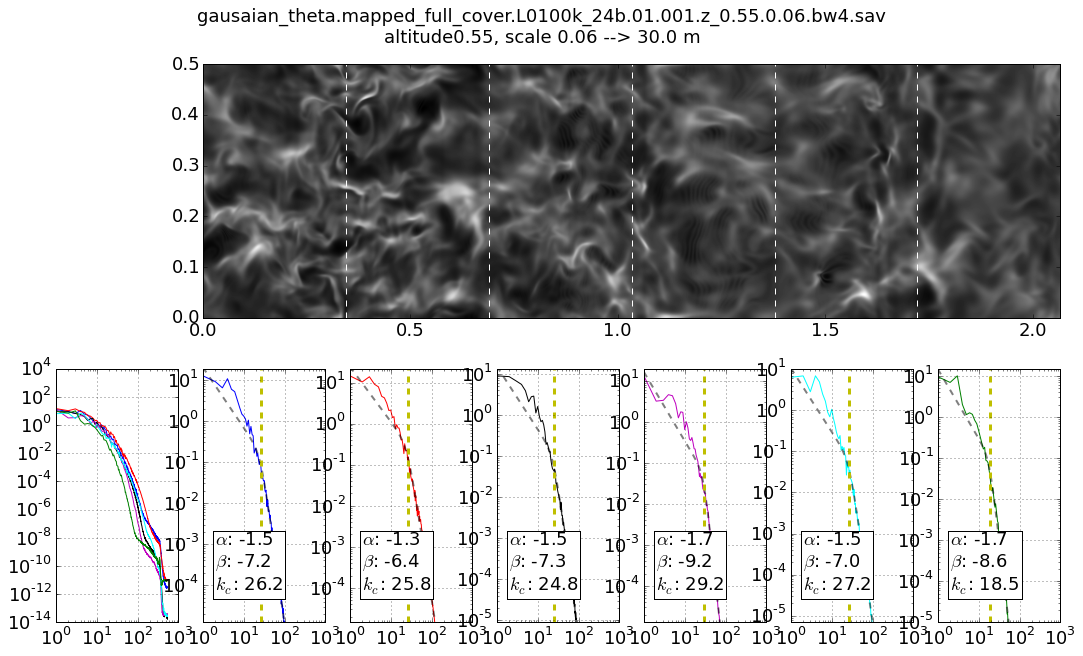

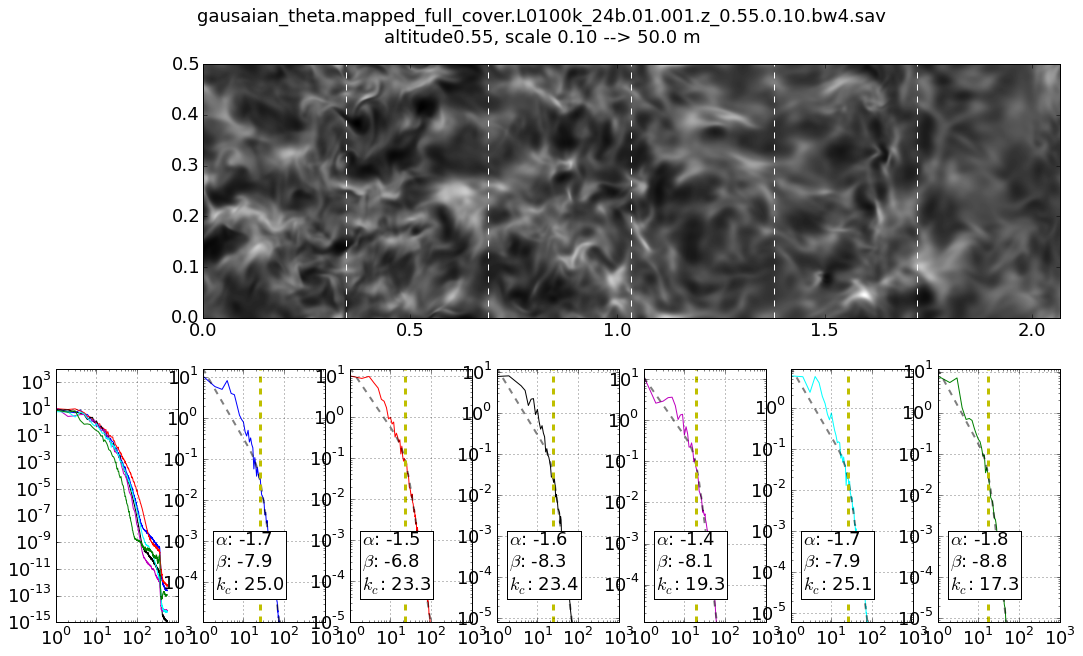

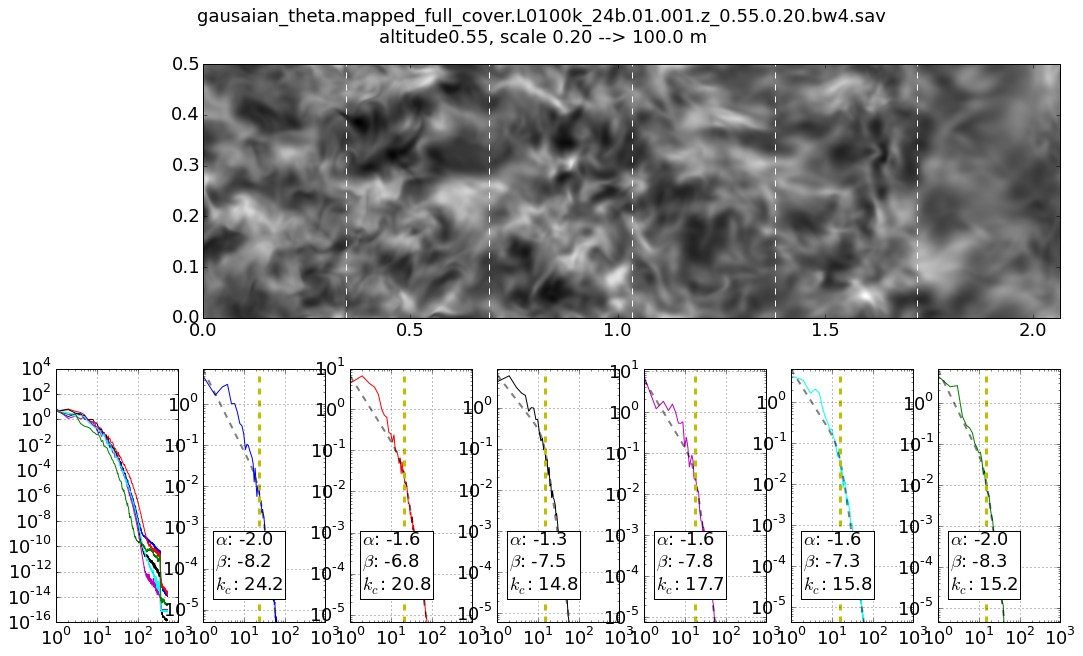

In [37]:

count = 0
for k,row in dd.iterrows():
    count += 1
    if count > 10:
        continue
    pmc_sim.plot_row(row)
    print row.x_segment_roll_residual
    #7/0

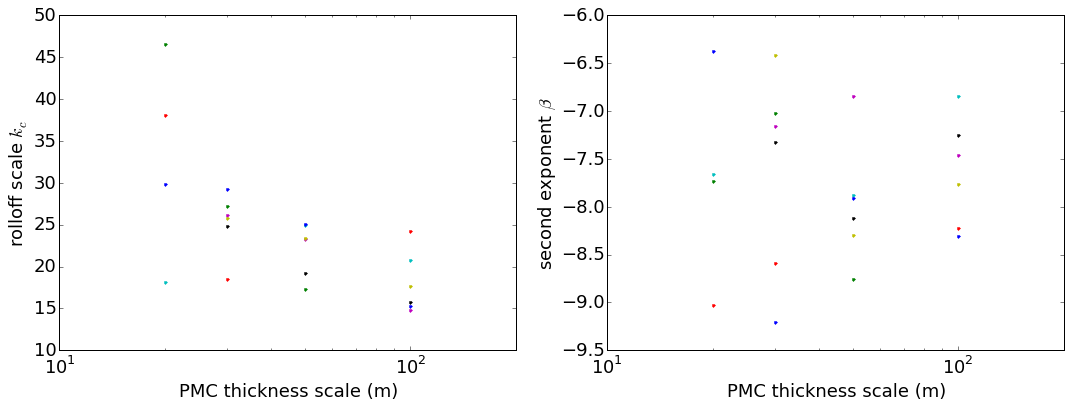

In [50]:
fig,axs = subplots(1,2,figsize=(18,6))
for k,row in dd.iterrows():
    for idx in range(6):
        if row.x_segment_roll_residual[idx] < 1e3:
            axs[0].semilogx(row.scale_m,row.x_segment_roll_roll_fc[idx],'.')
            axs[1].semilogx(row.scale_m,row.x_segment_roll_red_exp[idx]-row.x_segment_roll_roll_exp[idx],'.')
axs[0].set_xlim(10,200)
axs[1].set_xlim(10,200)

axs[0].set_xlabel('PMC thickness scale (m)')
axs[0].set_ylabel('rolloff scale $k_c$')
axs[1].set_xlabel('PMC thickness scale (m)')
axs[1].set_ylabel(r'second exponent $\beta$')